In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
buildings_df = pd.read_excel("export_ba.xlsx" , sheet_name=1)

In [3]:
buildings_df.head()

,Indikator,Ausprägung,Jahr,Raumbezug,Indikatorwert,Basiswert 1,Basiswert 2,Name Basiswert 1,Name Basiswert 2
0,Baufertigstellungen,Wohnfläche,2024,Stadt München,"71,7",424281,5914,Summe (Wohnflächen fertiggestellter Neubauwohn...,fertiggestellte Neubauwohnungen (insgesamt)
1,Baufertigstellungen,Wohnfläche,2024,01 Altstadt - Lehel,88,0,0,Summe (Wohnflächen fertiggestellter Neubauwohn...,fertiggestellte Neubauwohnungen (insgesamt)
2,Baufertigstellungen,Wohnfläche,2024,02 Ludwigsvorstadt - Isarvorstadt,"68,8",6539,95,Summe (Wohnflächen fertiggestellter Neubauwohn...,fertiggestellte Neubauwohnungen (insgesamt)
3,Baufertigstellungen,Wohnfläche,2024,03 Maxvorstadt,"56,2",2978,53,Summe (Wohnflächen fertiggestellter Neubauwohn...,fertiggestellte Neubauwohnungen (insgesamt)
4,Baufertigstellungen,Wohnfläche,2024,04 Schwabing - West,"29,9",6694,224,Summe (Wohnflächen fertiggestellter Neubauwohn...,fertiggestellte Neubauwohnungen (insgesamt)


In [4]:
unique_pairs = buildings_df[['Indikator', 'Ausprägung']].drop_duplicates()
print(unique_pairs)

                Indikator                           Ausprägung
0     Baufertigstellungen                           Wohnfläche
312   Baufertigstellungen  Wohnungen Ein- und Zweifamilienhaus
624   Baufertigstellungen              Wohnungen 1 und 2 Räume
936   Baufertigstellungen              Wohnungen 3 und 4 Räume
1248  Baufertigstellungen           Wohnungen 5 Räume und mehr
1560  Baufertigstellungen                          Wohnungsbau
1872     Baugenehmigungen                           Wohnfläche
2184     Baugenehmigungen  Wohnungen Ein- und Zweifamilienhaus
2496     Baugenehmigungen              Wohnungen 1 und 2 Räume
2808     Baugenehmigungen              Wohnungen 3 und 4 Räume
3120     Baugenehmigungen           Wohnungen 5 Räume und mehr
3432     Baugenehmigungen                          Wohnungsbau


In [5]:
standalone_df = buildings_df[(buildings_df['Indikator'] == 'Baufertigstellungen') & (buildings_df['Ausprägung'] == 'Wohnungen Ein- und Zweifamilienhaus')]

In [6]:
standalone_df.head()


,Indikator,Ausprägung,Jahr,Raumbezug,Indikatorwert,Basiswert 1,Basiswert 2,Name Basiswert 1,Name Basiswert 2
312,Baufertigstellungen,Wohnungen Ein- und Zweifamilienhaus,2024,Stadt München,"9,6",570,5914,fertiggestellte Neubauwohnungen (Ein- und Zwei...,fertiggestellte Neubauwohnungen (insgesamt)
313,Baufertigstellungen,Wohnungen Ein- und Zweifamilienhaus,2024,01 Altstadt - Lehel,88,0,0,fertiggestellte Neubauwohnungen (Ein- und Zwei...,fertiggestellte Neubauwohnungen (insgesamt)
314,Baufertigstellungen,Wohnungen Ein- und Zweifamilienhaus,2024,02 Ludwigsvorstadt - Isarvorstadt,"3,2",3,95,fertiggestellte Neubauwohnungen (Ein- und Zwei...,fertiggestellte Neubauwohnungen (insgesamt)
315,Baufertigstellungen,Wohnungen Ein- und Zweifamilienhaus,2024,03 Maxvorstadt,"3,8",2,53,fertiggestellte Neubauwohnungen (Ein- und Zwei...,fertiggestellte Neubauwohnungen (insgesamt)
316,Baufertigstellungen,Wohnungen Ein- und Zweifamilienhaus,2024,04 Schwabing - West,0,0,224,fertiggestellte Neubauwohnungen (Ein- und Zwei...,fertiggestellte Neubauwohnungen (insgesamt)


In [7]:
standalone_df = standalone_df.drop(columns=['Indikator', 'Basiswert 1', 'Indikatorwert', 'Name Basiswert 1','Name Basiswert 2','Ausprägung'])
standalone_df.rename(columns={'Basiswert 2': 'Value', "Raumbezug": "Location" , "Jahr": "Year"}, inplace=True)
standalone_df = standalone_df.reset_index(drop=True)
standalone_df['Year'] = standalone_df['Year'].astype(int)

In [8]:
standalone_df.head

<bound method NDFrame.head of      Year                           Location  Value
0    2024                      Stadt München   5914
1    2024                01 Altstadt - Lehel      0
2    2024  02 Ludwigsvorstadt - Isarvorstadt     95
3    2024                     03 Maxvorstadt     53
4    2024                04 Schwabing - West    224
..    ...                                ...    ...
307  2013            21 Pasing - Obermenzing    394
308  2013  22 Aubing - Lochhausen - Langwied    256
309  2013           23 Allach - Untermenzing    114
310  2013        24 Feldmoching - Hasenbergl    349
311  2013                            25 Laim     69

[312 rows x 3 columns]>

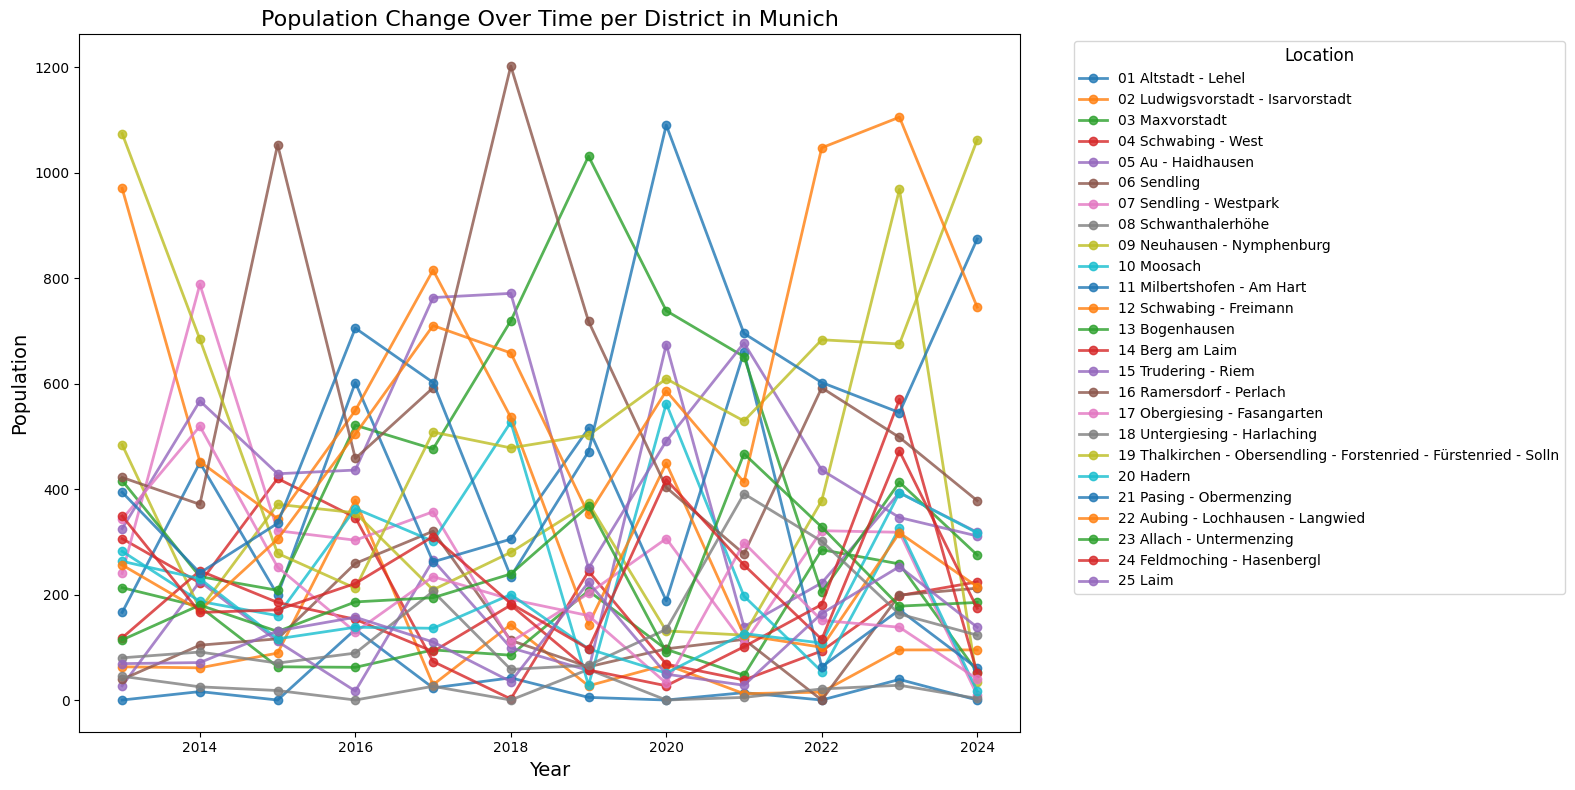

In [9]:

# Work on a copy
df = standalone_df.copy()

# Ensure correct column names
df.columns = [c.strip() for c in df.columns]

# Convert columns to numeric
df["Overall Population"] = pd.to_numeric(df["Value"], errors="coerce")
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Create pivot: rows = Year, columns = Location, values = Overall Population
pivot_df = df.pivot(index="Year", columns="Location", values="Overall Population")

# Choose locations to exclude from the legend (optional)
exclude = ["Stadt München"]  # example: remove the overall city line from legend

# Plot
plt.figure(figsize=(16, 8))  # Adjust figure size

for col in pivot_df.columns:
    if col not in exclude:
        plt.plot(
            pivot_df.index,
            pivot_df[col],
            label=col,
            linewidth=2,       # line thickness
            linestyle='-',     # line style
            marker='o',        # marker at each data point
            alpha=0.8          # transparency
        )

plt.ylabel("Population", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.title("Population Change Over Time per District in Munich", fontsize=16)

# Customize legend
plt.legend(
    title="Location",
    bbox_to_anchor=(1.05, 1),  # move outside to the right
    loc="upper left",
    fontsize=10,
    title_fontsize=12
)

plt.tight_layout()  # adjust layout to fit everything
plt.show()


In [ ]:

standalone_df['District'] = standalone_df['Location'].str.extract(r'^(\d{2})')  # Extract the first two digits

# Handle rows like 'Stadt München' (no digits)
standalone_df['District'] = standalone_df['District'].fillna('00')

# Remove the leading number and dash from Location text
standalone_df['Location'] = standalone_df['Location'].str.replace(r'^\d{2}\s*-\s*', '', regex=True)
standalone_df['Location'] = standalone_df['Location'].str.replace(r'^\d{2}\s*', '', regex=True)
# (Optional) Clean up whitespace
standalone_df['Location'] = standalone_df['Location'].str.strip()

print(standalone_df.head(10))

   Year                        Location  Value District
0  2024                   Stadt München   5914       00
1  2024                Altstadt - Lehel      0       01
2  2024  Ludwigsvorstadt - Isarvorstadt     95       02
3  2024                     Maxvorstadt     53       03
4  2024                Schwabing - West    224       04
5  2024                 Au - Haidhausen    318       05
6  2024                        Sendling    212       06
7  2024             Sendling - Westpark      9       07
8  2024                Schwanthalerhöhe      3       08
9  2024         Neuhausen - Nymphenburg     35       09


In [11]:
# Save your DataFrame as a CSV file
standalone_df.to_csv("standAloneHouses.csv", index=False, encoding='utf-8')